In [ ]:
!pip install nb_mypy

In [1]:
import nb_mypy

In [37]:
%load_ext nb_mypy

The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


In [44]:
%nb_mypy On

In [45]:
mystr : str = 1

In [40]:
mystr

1

In [41]:
from typing import Dict

In [42]:
mydict : Dict[int,str] = {0:"Abdul", "1":"Hannan"}
    
mydict

{0: 'Abdul', '1': 'Hannan'}

In [11]:
%nb_mypy Off

In [12]:
mydict : Dict[int,str] = {0:"Abdul", "1":"Hannan"}
    
mydict

{0: 'Abdul', '1': 'Hannan'}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [28]:
X_train, y_train = load_house_data()
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

In [17]:
X_norm[5,:]

array([-1.35, -1.1 , -0.79,  1.07])

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [5]:
print(f"Peak to Peak range by column in row X:{np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in row X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Point to point range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [7]:
sgdr = SGDRegressor()

sgdr.fit(X_norm, y_train)

SGDRegressor()

In [11]:
print(sgdr.coef_)
print(sgdr.intercept_)

[110.16 -21.09 -32.49 -38.05]
[363.15]


In [24]:
y_pred = sgdr.predict(X_norm)

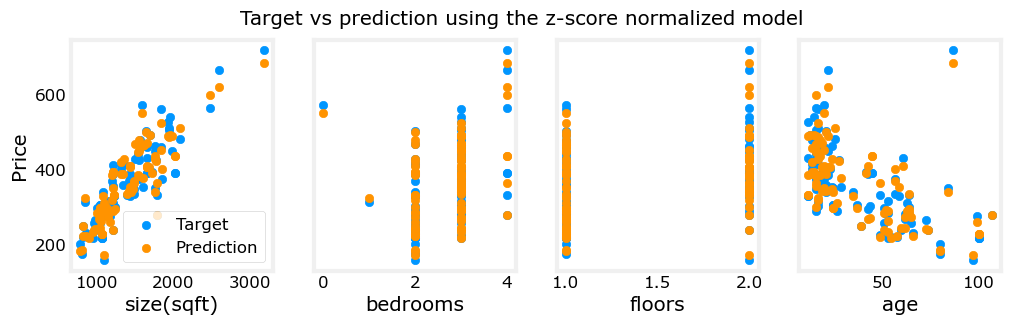

In [33]:
fig, ax = plt.subplots(1,4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label="Target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred,color=dlc["dlorange"], label="Prediction")
ax[0].set_ylabel("Price"),ax[0].legend()
fig.suptitle("Target vs prediction using the z-score normalized model")
plt.show()